In [1]:
from sklearn.datasets import load_breast_cancer, load_wine

In [18]:
import seaborn as sns
import pandas as pd

In [25]:
data = load_wine(as_frame=True)
data.keys()
wine = pd.DataFrame(data=data)
# wine

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
tips = sns.load_dataset('tips')

In [7]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
import sklearn

In [9]:
sklearn.__version__

'1.2.2'

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [13]:
ss.fit(wine[['proline']])
ss.transform(wine[['proline']])

NameError: name 'wine' is not defined

In [26]:
import tensorflow

In [27]:
mpg = sns.load_dataset('mpg')

In [28]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [33]:
mpg.columns[mpg.isna().any()]

Index(['horsepower'], dtype='object')

In [34]:
mpg.columns[mpg.isnull().any()]

Index(['horsepower'], dtype='object')

In [37]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [38]:
mpg.horsepower.isna().sum()

6

In [39]:
mpg[~mpg.horsepower.notna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [40]:
# !pip install -U missingno

In [46]:
mpg.horsepower.mean(skipna=False)

nan

In [43]:
import missingno as mino

In [44]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<AxesSubplot:>

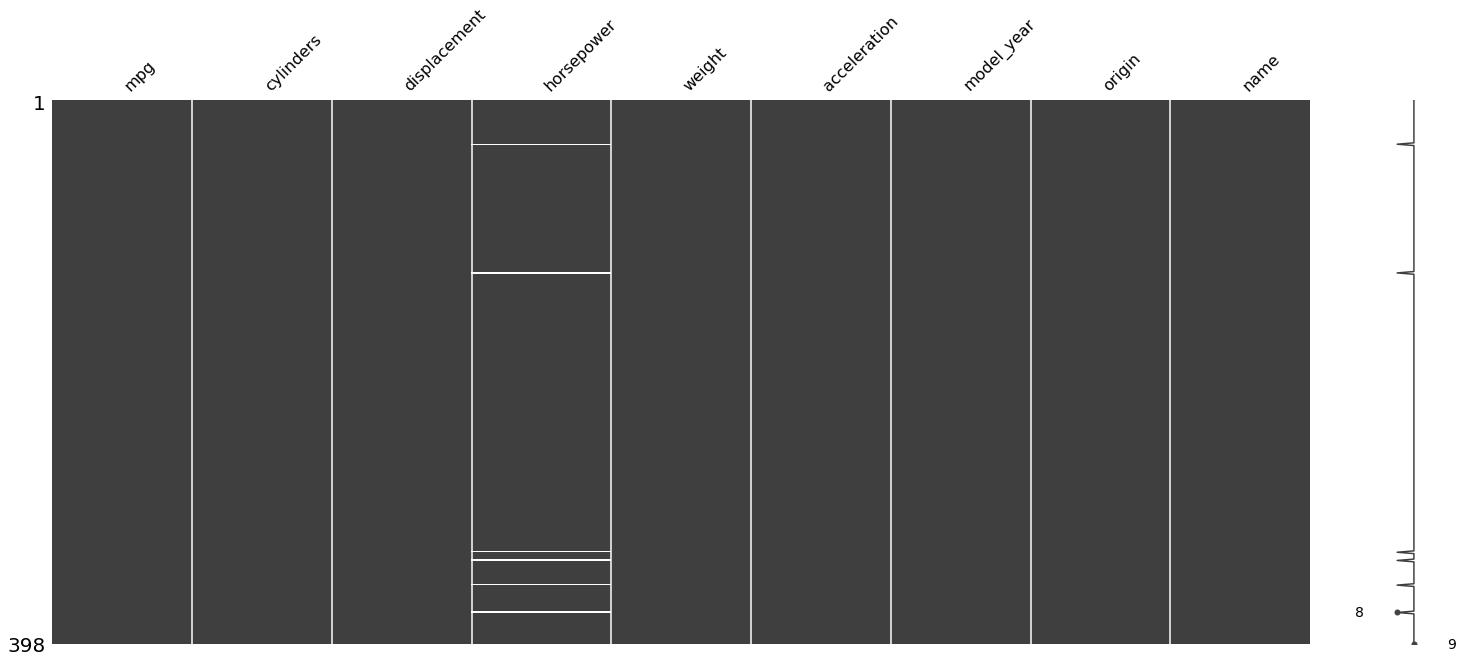

In [45]:
mino.matrix(mpg)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
temp = mpg.iloc[:,:4]

In [49]:
lr = LinearRegression()

In [51]:
# model에 missing data가 들어있으면 절대 안 된다
# 에러가 난다

lr.fit(temp.iloc[:,1:], temp.mpg)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# 결측치 처리
# impute

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.impute import SimpleImputer, KNNImputer

In [61]:
ss = SimpleImputer()

In [62]:
ss.fit_transform(mpg[['horsepower']])

array([[130.        ],
       [165.        ],
       [150.        ],
       [150.        ],
       [140.        ],
       [198.        ],
       [220.        ],
       [215.        ],
       [225.        ],
       [190.        ],
       [170.        ],
       [160.        ],
       [150.        ],
       [225.        ],
       [ 95.        ],
       [ 95.        ],
       [ 97.        ],
       [ 85.        ],
       [ 88.        ],
       [ 46.        ],
       [ 87.        ],
       [ 90.        ],
       [ 95.        ],
       [113.        ],
       [ 90.        ],
       [215.        ],
       [200.        ],
       [210.        ],
       [193.        ],
       [ 88.        ],
       [ 90.        ],
       [ 95.        ],
       [104.46938776],
       [100.        ],
       [105.        ],
       [100.        ],
       [ 88.        ],
       [100.        ],
       [165.        ],
       [175.        ],
       [153.        ],
       [150.        ],
       [180.        ],
       [170

In [58]:
titanic = sns.load_dataset('titanic')

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [64]:
mpg.origin.nunique()

3

In [65]:
import pandas as pd

In [66]:
# 함수방법
pd.get_dummies(mpg.origin)

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [67]:
# 메소드 방법
mpg.origin.str.get_dummies()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
ohe = OneHotEncoder()

In [71]:
# 0이 많으면 압축을 해서 보여준다
# 바로 스파스 매트릭스 sparse?
# toarray()를 찍으면 보여준다.
ohe.fit_transform(mpg[['origin']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [72]:
# 유럽이라고 알려준다.
ohe.inverse_transform([[1,0,0]])

array([['europe']], dtype=object)

In [74]:
mpg['usa'] = (mpg.origin == 'usa')*1
mpg['europe'] = (mpg.origin == 'europe')*1
mpg['japan'] = (mpg.origin == 'japan')*1

In [75]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,usa,europe,japan
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,1,0,0


In [76]:
mpg.origin.map({'usa':0, 'europe':1, 'japan':2})

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    1
395    0
396    0
397    0
Name: origin, Length: 398, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [78]:
le = LabelEncoder()

In [79]:
le.fit_transform(mpg.origin)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,

In [80]:
le.inverse_transform([2,1,2])

array(['usa', 'japan', 'usa'], dtype=object)

In [81]:
oe = OrdinalEncoder()

In [82]:
oe.fit_transform(mpg[['origin']])

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [85]:
iris = sns.load_dataset('iris')

In [86]:
knn = KNeighborsClassifier()

In [91]:
y = iris.species.str.get_dummies()

In [92]:
knn.fit(iris.iloc[:,:-1], y)

KNeighborsClassifier()

In [93]:
knn.predict([[3,3,3,3]])

C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0, 1, 0]], dtype=int64)

In [94]:
knn.predict_proba([[3,3,3,3]])

C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[array([[1., 0.]]), array([[0.2, 0.8]]), array([[0.8, 0.2]])]

# 아래 전부 에러난다 사이킷런은 1D가 기본이다.
근데 y가 더미변수라 1d가 아니라 2d임

In [96]:
lr = LogisticRegression()

In [97]:
lr.fit(iris.iloc[:,:-1], y)

ValueError: y should be a 1d array, got an array of shape (150, 3) instead.

In [99]:
gbb = GaussianNB()

In [100]:
gbb.fit(iris.iloc[:,:-1], y)

ValueError: y should be a 1d array, got an array of shape (150, 3) instead.